In [4]:
library(BUSpaRse)
library(here)
library(Matrix)
library(tidyverse)
library(Seurat)
library(ggpointdensity)
library(scico)
library(scales)
library(DropletUtils)
library(reticulate)
library(repr)
library(DoubletFinder)
library(future)
options(future.globals.maxSize = 100000 * 1024^2)

proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 4,]$genes)

# Slightly modified from BUSpaRse, just to avoid installing a few dependencies not used here
read_count_output <- function(dir, name) {
  dir <- normalizePath(dir, mustWork = TRUE)
  m <- readMM(paste0(dir, "/", name, ".mtx"))
  m <- Matrix::t(m)
  m <- as(m, "dgCMatrix")
  # The matrix read has cells in rows
  ge <- ".genes.txt"
  genes <- readLines(file(paste0(dir, "/", name, ge)))
  barcodes <- readLines(file(paste0(dir, "/", name, ".barcodes.txt")))
  colnames(m) <- barcodes
  rownames(m) <- genes
  return(m)
}


In [7]:
wt1_combined = readMM("/home/robotmessenger810/sc_analysis/data/raw_count_matrices/combined_pre_empty_drops/wt_1_matrix.mtx")
wt2_combined = readMM("/home/robotmessenger810/sc_analysis/data/raw_count_matrices/combined_pre_empty_drops/wt_2_matrix.mtx")
mut1_combined = readMM("/home/robotmessenger810/sc_analysis/data/raw_count_matrices/combined_pre_empty_drops/mut_1_matrix.mtx")
mut2_combined = readMM("/home/robotmessenger810/sc_analysis/data/raw_count_matrices/combined_pre_empty_drops/mut_2_matrix.mtx")

In [8]:
#get distribution of UMIs 
wt1_colsums = colSums(wt1_combined)
wt2_colsums = colSums(wt2_combined)
mut1_colsums = colSums(mut1_combined)
mut2_colsums =colSums(mut2_combined)

#some summary stats
length(wt1_colsums)
length(wt2_colsums)
length(mut1_colsums)
length(mut2_colsums)

[1] 290626

[1] 349207

[1] 308290

[1] 352143

[1] 13637

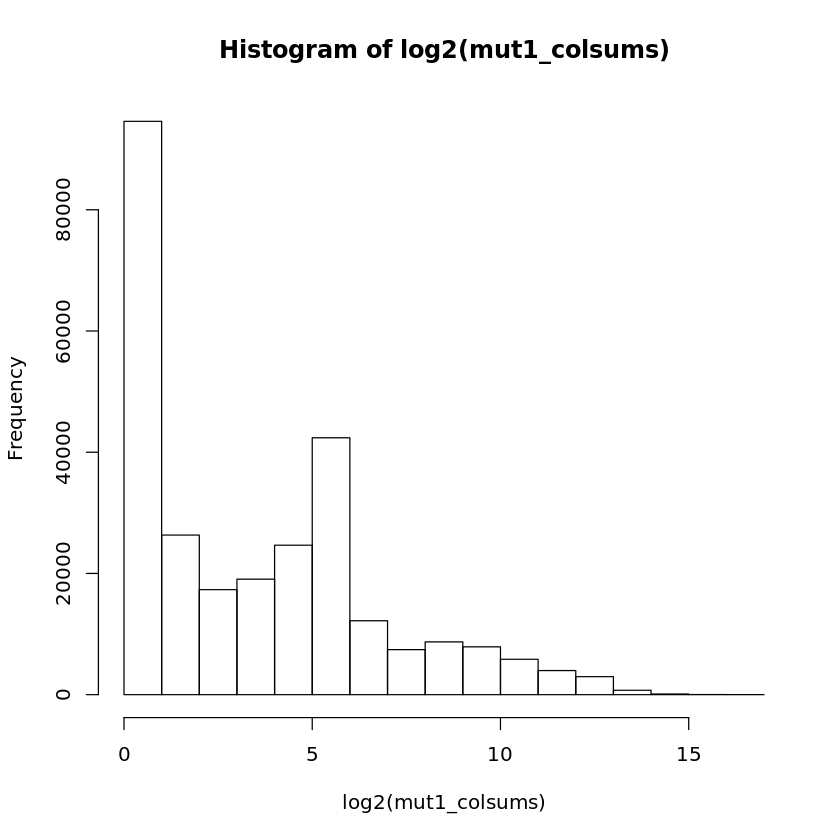

In [31]:
# hist(log2(wt1_colsums))
# sum(wt1_colsums > 1000)
#median(wt1_colsums[wt1_colsums > 500])

# hist(log2(wt2_colsums))
# sum(wt2_colsums > 1000)

hist(log2(mut1_colsums))
sum(mut1_colsums > 2^10)

# hist(log2(mut2_colsums))
# sum(mut2_colsums > 500)